clean and merge the data
---

In [2]:
import torch
import pandas as pd 
import numpy as np 
import glob
import matplotlib.pyplot  as plt
import os
from sklearn.model_selection import train_test_split
import os
import shutil
from PIL import Image, ImageOps

## cleam DAGM data set by remove unwanted class 

In [3]:
file_list = glob.glob('data_src/DAGM2007/train/labels/*.txt')
file_test_list = glob.glob('data_src/DAGM2007/test/labels/*.txt')
def text_to_df(file_list):
    main_dataframe = pd.DataFrame(columns= ['name','class','cords'])
    bbcount=0
    for i in range(0,len(file_list)):
        data =np.loadtxt(file_list[i],ndmin=2)
        bbcount+= data.shape[0]
        df = pd.DataFrame({'name':file_list[i],'class':data[:,0],'cords': data[:,1:].tolist()},columns= ['name','class','cords'])
        main_dataframe = pd.concat([main_dataframe, df], axis = 0,ignore_index=True)
    print("#"*15 )    
    print(len(file_list) )
    print(main_dataframe.shape)
    print(bbcount)
    return main_dataframe
    
trainDf = text_to_df(file_list)
testDf = text_to_df(file_test_list)
trainDf.head(5)

###############
1046
(1046, 3)
1046
###############
1054
(1054, 3)
1054


,name,class,cords
0,data_src/DAGM2007/train/labels\000001.txt,4.0,"[0.2021, 0.6904, 0.334, 0.3301]"
1,data_src/DAGM2007/train/labels\000002.txt,4.0,"[0.2217, 0.6299, 0.1699, 0.1621]"
2,data_src/DAGM2007/train/labels\000003.txt,4.0,"[0.5107, 0.2832, 0.2676, 0.3672]"
3,data_src/DAGM2007/train/labels\000004.txt,4.0,"[0.2773, 0.6865, 0.25, 0.2559]"
4,data_src/DAGM2007/train/labels\000005.txt,4.0,"[0.1777, 0.1514, 0.1641, 0.1621]"


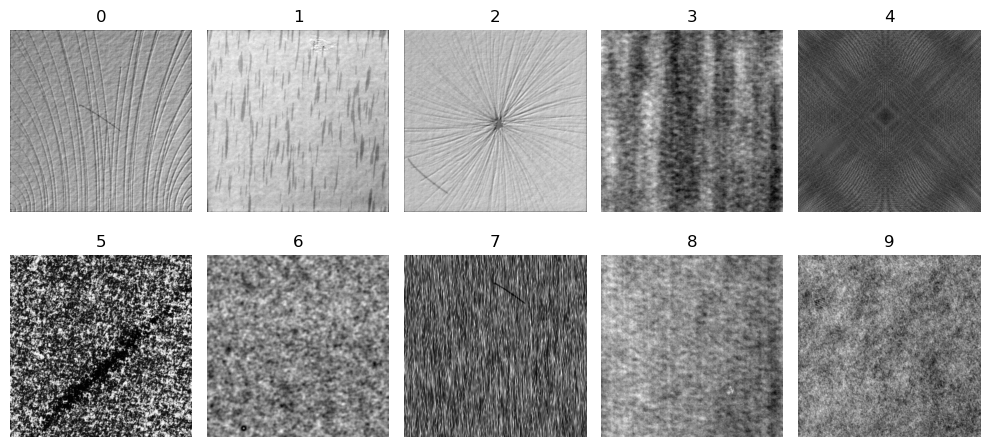

In [4]:
fig , ax = plt.subplots(2,5, figsize= (10,6),sharex=True,sharey=True,squeeze=True)
for i in range(10):
    file_name= trainDf.loc[trainDf['class'] == i,'name'].sample(1).iloc[0]
    image_name= file_name.replace("labels", "images").replace("txt", "jpg")
    ax[i//5,i-5*(i//5)].imshow(plt.imread(image_name))
    ax[i//5,i-5*(i//5)].set_title(str(i))
    ax[i//5,i-5*(i//5)].axis('off') 
    
plt.subplots_adjust(hspace=-0.4)    
fig.tight_layout() 
plt.show()

choose 0 2 7 classes 

## chose 3 classes as the line class

In [5]:
def select_classes(df):
    ndf = df.loc[df['class'].isin( (0,2,7)),:]
    ndf.loc[:,'class'] = [1]*len(ndf['class'])
    ndf['image_name'] = ndf['name'].str.replace("labels", "images").str.replace("txt", "jpg")
    return ndf

ntrainDf=select_classes(trainDf)
ntestDf=select_classes(testDf)

C:\Users\amrlo\anaconda3\envs\pt\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
C:\Users\amrlo\AppData\Local\Temp\ipykernel_14652\2526294778.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf['image_name'] = ndf['name'].str.replace("labels", "images").str.replace("txt", "jpg")


In [6]:
ntrainDf.head()

,name,class,cords,image_name
79,data_src/DAGM2007/train/labels\000080.txt,1,"[0.7461, 0.3945, 0.1992, 0.1211]",data_src/DAGM2007/train/images\000080.jpg
80,data_src/DAGM2007/train/labels\000081.txt,1,"[0.2109, 0.5586, 0.1562, 0.0898]",data_src/DAGM2007/train/images\000081.jpg
81,data_src/DAGM2007/train/labels\000082.txt,1,"[0.7051, 0.5762, 0.1094, 0.0703]",data_src/DAGM2007/train/images\000082.jpg
82,data_src/DAGM2007/train/labels\000083.txt,1,"[0.6855, 0.5449, 0.2227, 0.0938]",data_src/DAGM2007/train/images\000083.jpg
83,data_src/DAGM2007/train/labels\000084.txt,1,"[0.3691, 0.5254, 0.2539, 0.0703]",data_src/DAGM2007/train/images\000084.jpg


In [7]:
ntestDf.head()

,name,class,cords,image_name
239,data_src/DAGM2007/test/labels\000240.txt,1,"[0.8975, 0.6074, 0.1387, 0.3711]",data_src/DAGM2007/test/images\000240.jpg
240,data_src/DAGM2007/test/labels\000241.txt,1,"[0.8242, 0.8027, 0.1055, 0.3906]",data_src/DAGM2007/test/images\000241.jpg
241,data_src/DAGM2007/test/labels\000242.txt,1,"[0.333, 0.8379, 0.4316, 0.2852]",data_src/DAGM2007/test/images\000242.jpg
242,data_src/DAGM2007/test/labels\000243.txt,1,"[0.3086, 0.3076, 0.1328, 0.1973]",data_src/DAGM2007/test/images\000243.jpg
243,data_src/DAGM2007/test/labels\000244.txt,1,"[0.5869, 0.875, 0.1348, 0.0938]",data_src/DAGM2007/test/images\000244.jpg


In [8]:
print(ntrainDf.shape)
print(ntestDf.shape)

(298, 4)
(368, 4)


## delete other classes

In [9]:
def delet_files(files , images,df):
    deletdf = pd.DataFrame({'name': glob.glob(files),
                  'image_name': glob.glob(images)})

    mask = ~ deletdf['name'].isin(df['name'])
    deletdf = deletdf.loc[mask,:]
    deletdf['name'].apply(os.remove)
    deletdf['image_name'].apply(os.remove)
    print(f"number pf deleted files {deletdf.shape}")
    
delet_files('data_src/DAGM2007/train/labels/*.txt' , 'data_src/DAGM2007/train/images/*.jpg',ntrainDf )
delet_files('data_src/DAGM2007/test/labels/*.txt' , 'data_src/DAGM2007/test/images/*.jpg' ,ntestDf)

def write_bb(series):
    f = open(series['name'], "w")
    f.write(str(series['class'])+' ' + ' '.join(map(str, series['cords'])))
    f.close()
    
ntrainDf.apply(lambda x : write_bb(x),axis =1)
ntestDf.apply(lambda x : write_bb(x),axis =1)

print(ntrainDf.shape)
print(ntestDf.shape)

number pf deleted files (748, 2)
number pf deleted files (686, 2)
(298, 4)
(368, 4)


# merge all data

create directories for the data

In [10]:
dmag_paths = ['data_src/DAGM2007/' ,
             'data_src/DAGM2007/train/images/*.jpg',
             'data_src/DAGM2007/train/labels/*.txt',
             'data_src/DAGM2007/test/images/*.jpg',
             'data_src/DAGM2007/test/labels/*.txt',
             ]
stain_paths = ['data_src/FABRIC STAIN DATASET/images/stain/*.jpg','src/FABRIC STAIN DATASET/annotations/stain/*.txt']
data_path = 'dataset/'
newdirs=['alldata','train','val']
imgLab = ['/images' ,'/labels']
for newdir in newdirs:
    os.makedirs(data_path+newdir) if not os.path.exists(data_path+newdir) else None
    os.makedirs(data_path+newdir+imgLab[0]) if not os.path.exists(data_path+newdir+imgLab[0]) else None
    os.makedirs(data_path+newdir+imgLab[1]) if not os.path.exists(data_path+newdir+imgLab[1]) else None

## Get the Data Images and labels
make list by all the data we have to copy it in one place.

In [11]:
images_path = [
    'data_src/FABRIC STAIN DATASET/images/stain/*.jpg',
               'data_src/DAGM2007/train/images/*.jpg',
               'data_src/DAGM2007/test/images/*.jpg',
               'data_src/gen/staindata/images/*.png',
               'data_src/gen/linedata/images/*.png'
        
              ]

labels_path = [
    'data_src/FABRIC STAIN DATASET/annotations/stain/*.txt',
               'data_src/DAGM2007/train/labels/*.txt',
               'data_src/DAGM2007/test/labels/*.txt',
               'data_src/gen/staindata/labels/*.txt',
               'data_src/gen/linedata/labels/*.txt'
              
              ]
images = []
labels = []
for i in range(len(labels_path)):
    images +=glob.glob(images_path[i])
    labels +=glob.glob(labels_path[i])
    
print(len(images))
print(len(labels))

df = pd.DataFrame(   {"image": images,  "label": labels   })

1280
1280


create data frame for all data and double it to invert images.

In [12]:

df['class'] = 0
df.loc[:len(glob.glob(stain_paths[0])),'class'] =1


df['invert'] = False
df2 = df.copy()
df2['invert'] = True
df = df.append(df2,ignore_index=True)

df['new_image'] = df.index.astype(str).str.zfill(5)+'.jpg'
df['new_label'] = df.index.astype(str).str.zfill(5)+'.txt'
del(df2)

In [13]:
df

,image,label,class,invert,new_image,new_label
0,data_src/FABRIC STAIN DATASET/images/stain\1.jpg,data_src/FABRIC STAIN DATASET/annotations/stai...,1,False,00000.jpg,00000.txt
1,data_src/FABRIC STAIN DATASET/images/stain\10.jpg,data_src/FABRIC STAIN DATASET/annotations/stai...,1,False,00001.jpg,00001.txt
2,data_src/FABRIC STAIN DATASET/images/stain\100...,data_src/FABRIC STAIN DATASET/annotations/stai...,1,False,00002.jpg,00002.txt
3,data_src/FABRIC STAIN DATASET/images/stain\101...,data_src/FABRIC STAIN DATASET/annotations/stai...,1,False,00003.jpg,00003.txt
4,data_src/FABRIC STAIN DATASET/images/stain\102...,data_src/FABRIC STAIN DATASET/annotations/stai...,1,False,00004.jpg,00004.txt
...,...,...,...,...,...,...
2555,data_src/gen/linedata/images\0140.png,data_src/gen/linedata/labels\0140.txt,0,True,02555.jpg,02555.txt
2556,data_src/gen/linedata/images\0141.png,data_src/gen/linedata/labels\0141.txt,0,True,02556.jpg,02556.txt
2557,data_src/gen/linedata/images\0142.png,data_src/gen/linedata/labels\0142.txt,0,True,02557.jpg,02557.txt
2558,data_src/gen/linedata/images\0143.png,data_src/gen/linedata/labels\0143.txt,0,True,02558.jpg,02558.txt


In [14]:
train, val = train_test_split(df, test_size=0.15,  shuffle=True, stratify=df['class'])
print('Data shapes:')
print(df.shape)
print(train.shape)
print(val.shape)

Data shapes:
(2560, 6)
(2176, 6)
(384, 6)


## copy all the data 
format new names for all data to remove the name confilects and copy all data onto on directory 

note : all data on yolov5 formate.

In [15]:
train['new_image'] = 'dataset/train/images/'+train['new_image'] 
train['new_label'] = 'dataset/train/labels/'+train['new_label']

val['new_image'] = 'dataset/val/images/'+val['new_image'] 
val['new_label'] = 'dataset/val/labels/'+val['new_label']

In [16]:
def make_copy(series):
    if series['invert']: 
        shutil.copy2(series['image'] ,series['new_image'] ) 
    else:
        img = Image.open(series['image']) 
        img = ImageOps.invert(img)
        img.save(series['new_image'])
                 
    shutil.copy2(series['label'] ,series['new_label'] )


train.apply(make_copy, axis =1)  
val.apply( make_copy  ,axis =1)  
 
print('done')

done
